## Problem Statement: 

### Jamboree has helped thousands of students to make it to top colleges abroad. They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective. 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
# Lets scale the data, standardization 
from sklearn.preprocessing import StandardScaler

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Jamboree_Admission.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [5]:
# There are no null values in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
#There is no missing data in the dataset
def missing_data(data):
    
    total_missing_data = data.isnull().sum().sort_values(ascending = False)
    percent_missing_data = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False)
    missing = pd.concat([total_missing_data, percent_missing_data], axis =1, keys = ['Total','Percent'])
    return missing
    
missing_data(data)

,Total,Percent
Serial No.,0,0.0
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


In [8]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
data = data[data.columns.drop('Serial No.')]
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


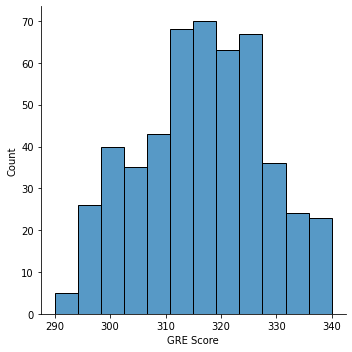

In [10]:
sns.displot(data['GRE Score'])

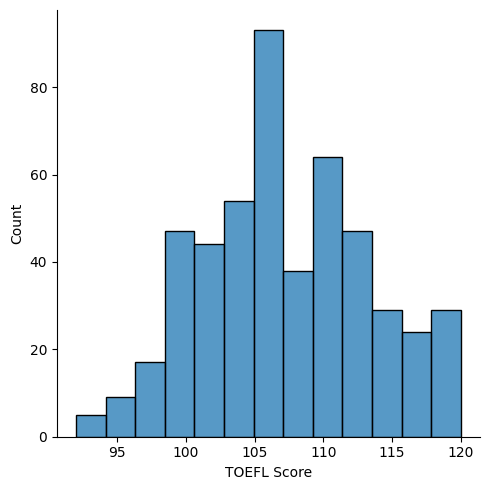

In [11]:
sns.displot(data['TOEFL Score'])

<AxesSubplot:xlabel='SOP'>

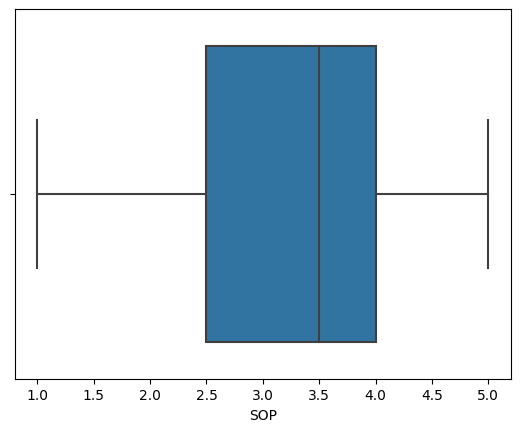

In [12]:
sns.boxplot(data['SOP'])


<AxesSubplot:xlabel='University Rating'>

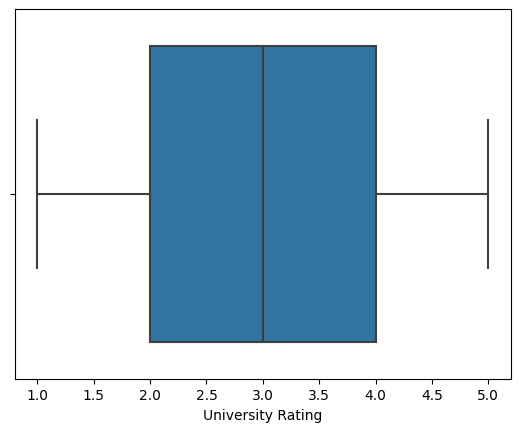

In [13]:
sns.boxplot(data['University Rating'])

<AxesSubplot:xlabel='GRE Score'>

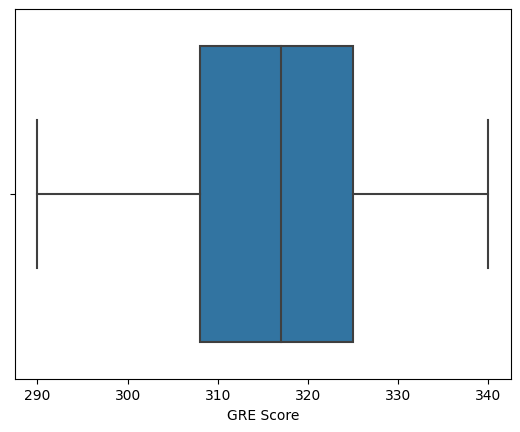

In [14]:
sns.boxplot(data['GRE Score'])

### There are no outliers in the data

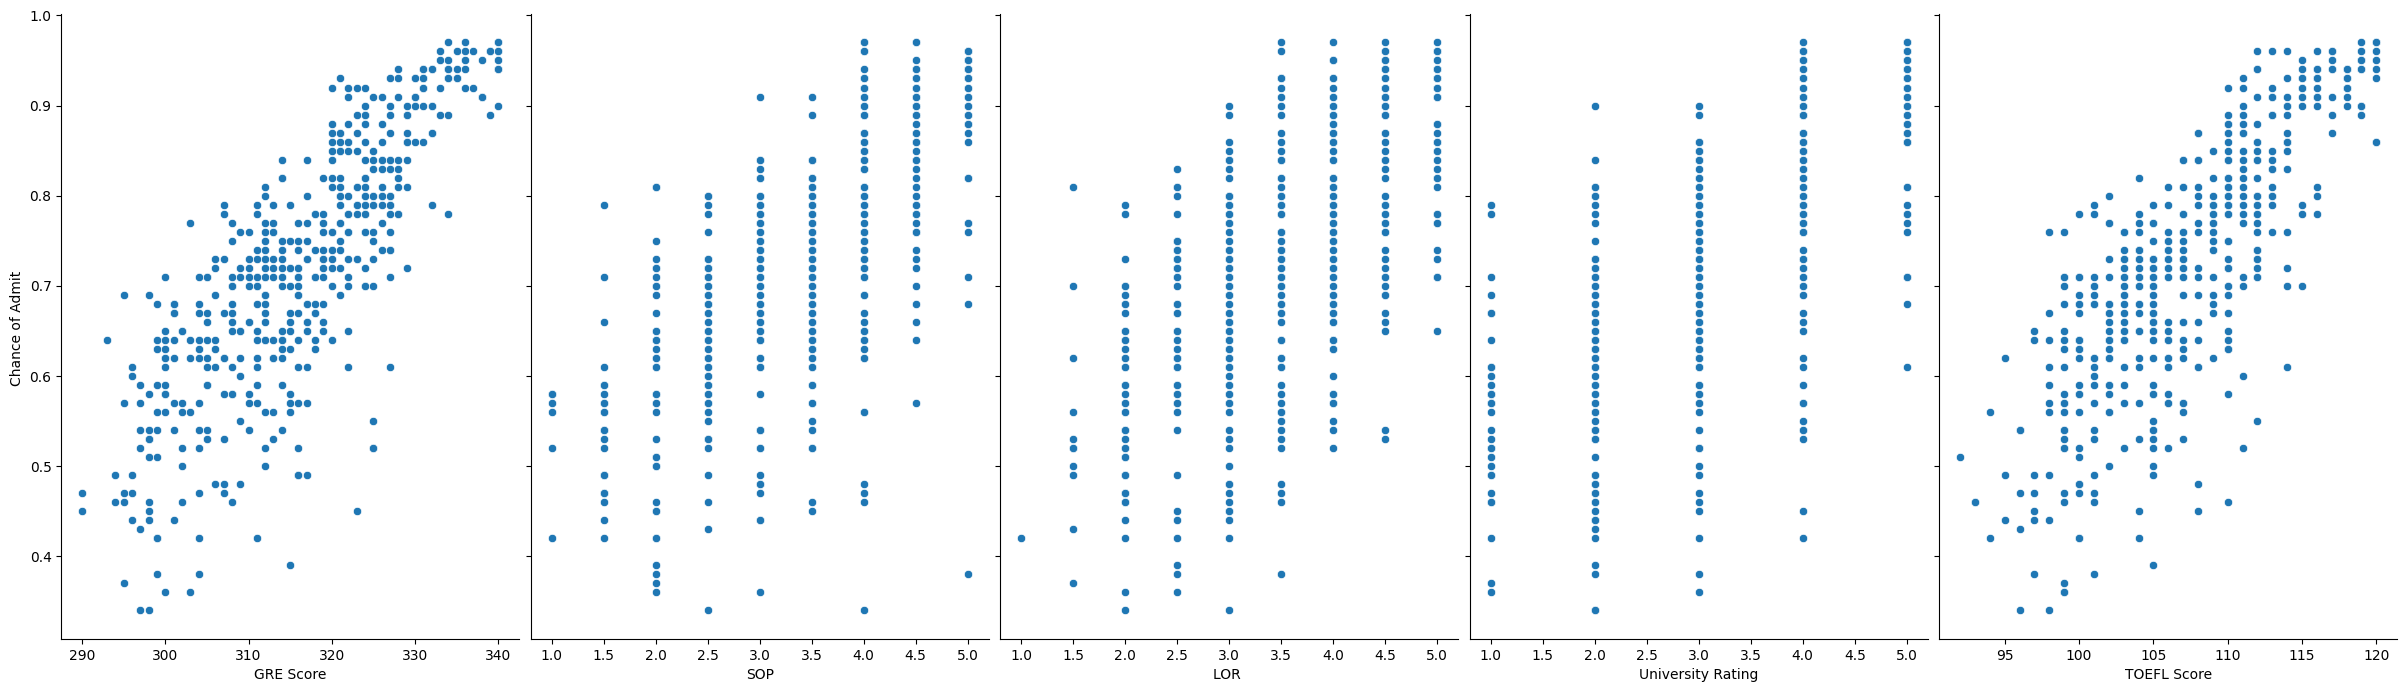

In [15]:
sns.pairplot(data, x_vars=['GRE Score','SOP','LOR ','University Rating','TOEFL Score'], y_vars='Chance of Admit ',size=7, aspect=0.7, kind='scatter')

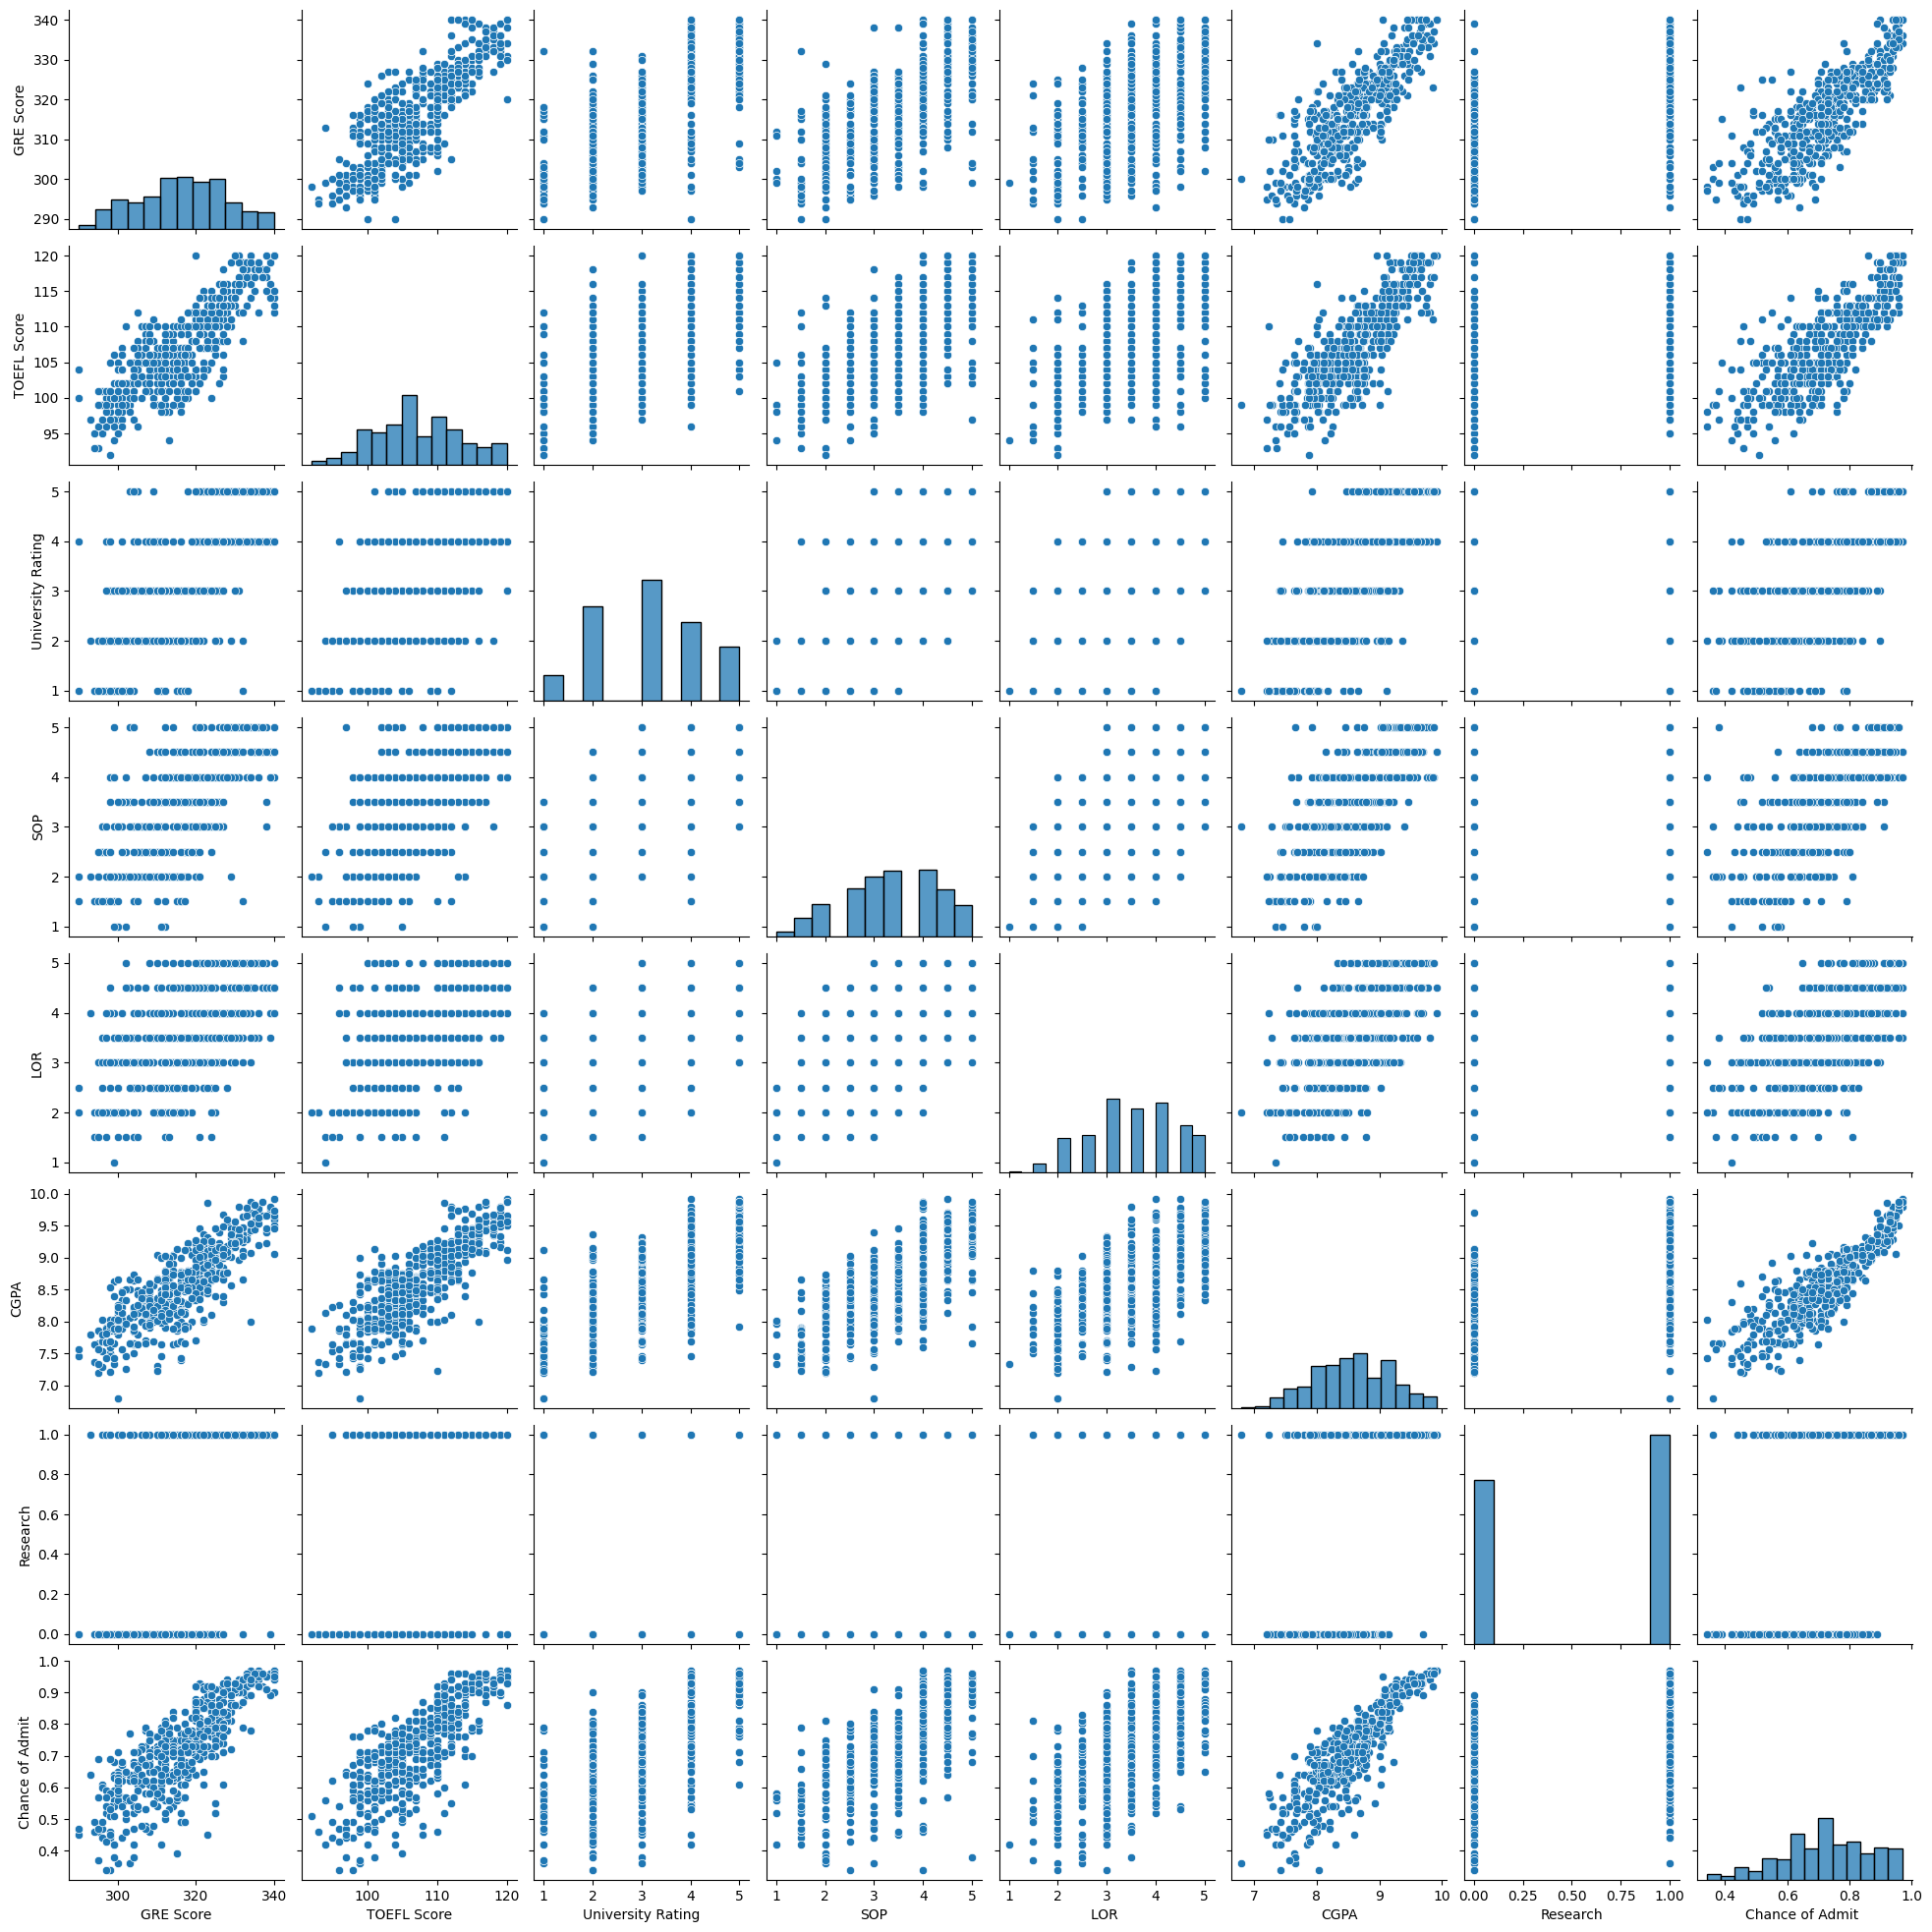

In [16]:
sns.pairplot(data)
plt.show()

#### Its hard to interpret the pairplots, we can try checking the heatmap for better insights

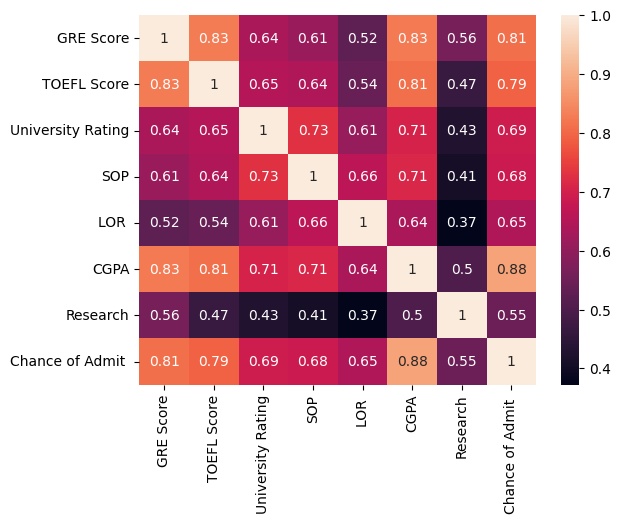

In [17]:
sns.heatmap(data.corr(), annot =True)
plt.show()

#### By looking at the heatmap, we can confirm that almost all the features have high positive correlation with the target variable.

#### Thus while building the model, we need to pay attention to multicolinearity

In [18]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
#Separating my target variable and independent columns
x = data.loc[:,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]
y = data['Chance of Admit ']

In [20]:
#Standardizing the data
sc = StandardScaler()
cols = x.columns
x[cols] = sc.fit_transform(x[cols])

In [21]:
#splitting my data into train, test and cv

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

In [22]:
## Performing linear regression

lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
print(lr.intercept_)

0.7182337995019021


In [25]:
coeff_df = pd.DataFrame(lr.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GRE Score,0.012748
TOEFL Score,0.021345
University Rating,0.005982
SOP,0.000547
LOR,0.015929
CGPA,0.077016
Research,0.013696


In [26]:
y_pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [28]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00340914251390877
r_square_value : 0.8355717634850119


## Assumptions of the Linear Regression Model

### Assumption -1 : Multicolinearity check by VIF Score

In [29]:
x_sm = sm.add_constant(X_train)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(y_train, x_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     212.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.71e-120
Time:                        16:52:50   Log-Likelihood:                 485.93
No. Observations:                 350   AIC:                            -955.9
Df Residuals:                     342   BIC:                            -925.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7182      0.00

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
X_t = X_train
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.75
5,CGPA,4.69
1,TOEFL Score,3.73
3,SOP,2.73
2,University Rating,2.48
4,LOR,1.97
6,Research,1.49


### As there is no feature with VIF > 5, we assume that the features doesn't have multicolinearity

### Assumption - 2 : Mean of residuals is nearly zero

0.011687334993658803

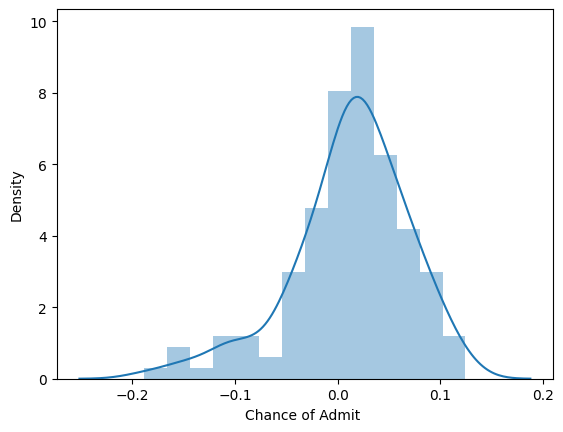

In [32]:
error = y_test - y_pred
sns.distplot(error)
error.mean()

#### Mean of residuals is 0.011 which is nearly zero

### Assumption - 3: Linearity of variables

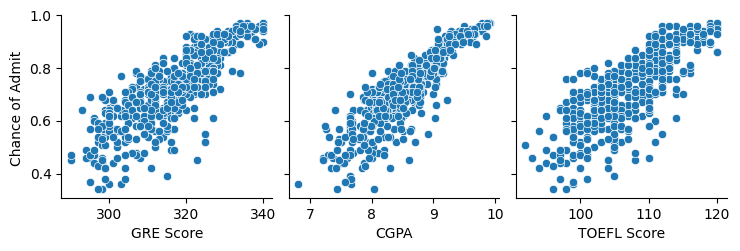

In [33]:
sns.pairplot(data, x_vars= ['GRE Score', 'CGPA', 'TOEFL Score'], y_vars = 'Chance of Admit ', kind = 'scatter')

### Assumption - 4: Test for Homoscedasticity

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Chance of Admit '>

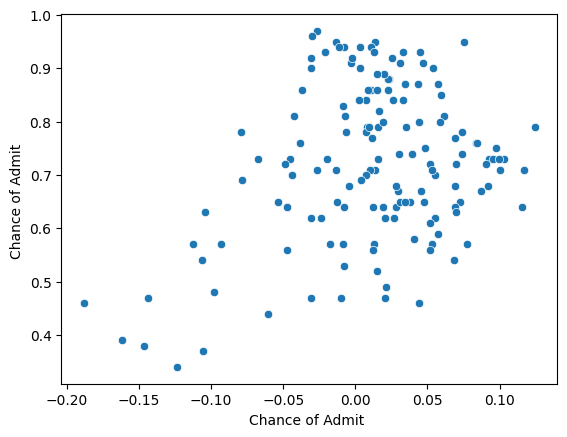

In [34]:
sns.scatterplot(error, y_test)

### Assumption - 5: Normality of residuals

In [35]:
from statsmodels.graphics.gofplots import qqplot

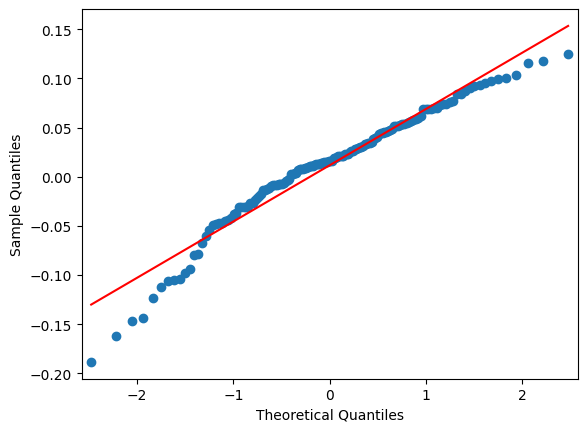

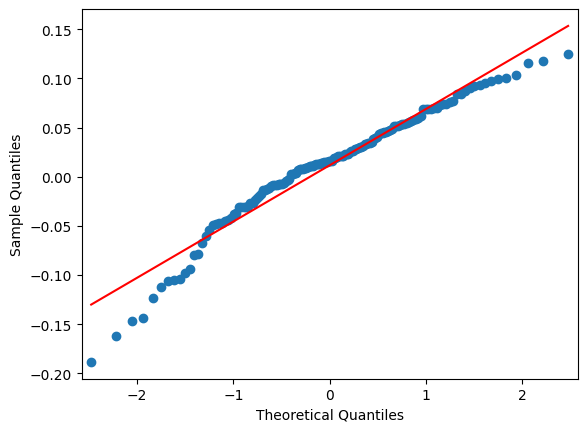

In [36]:
qqplot(error, line ='s')

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
r_squared = round(r2_score(y_pred,y_test),2)
r_squared

0.82

In [38]:
Adj_r2 = 0.813  # from the summary table

In [39]:
mean_absolute_error = round(sum(abs(y_test-y_pred)),2)

In [40]:
mean_absolute_error

6.82

In [41]:
import math
RMSE = round(math.sqrt(sum((y_test - y_pred)**2) / data.shape[0]),2)

In [42]:
RMSE

0.03

## Model Performance Evaluation

### Mean Absolute error - 6.82
### RMSE - 0.03
### R2 - 0.82
### Adj R2 - 0.813

## Insights and Recommendations

### Insights
#### 1) CGPA is one of the most critical factor impacting the admissions followed by TOEFL scores as it has the high coefficient
#### 2) Having this feature enables students to focus more on the exams rather than spending time on selecting the colleges
#### 3) This feature also helps students to save lot of money as every admission costs few dollars.
#### 4) Having more data will enable us to extract much more information.

### Recommendations
#### 1) we can further optimize this feature by getting few more data points. so that the students never miss on Ivy league colleges.